In [ ]:
!pip install datasets
import librosa
import datasets
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
gsc = datasets.load_dataset('google/speech_commands', 'v0.02', trust_remote_code=True)

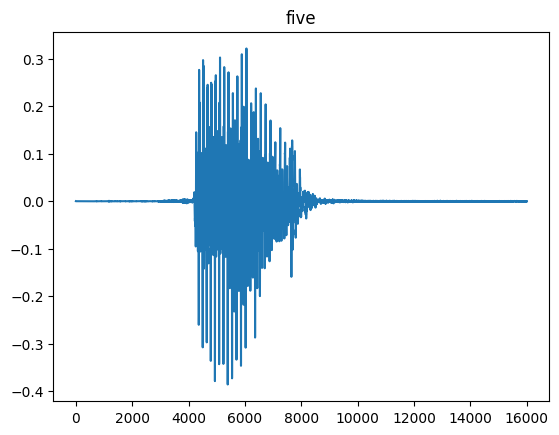

In [ ]:
# Get random sample (for testing)
sample = np.random.randint(0,gsc['train'].num_rows)

# Get data from sample
filename, audio, label, is_unknown, speaker_id, utterance_id = gsc['train'][sample].values()
path, array, sampling_rate = audio.values()

# Show waveform and which word was spoken in plot
plt.plot(array)
plt.title(path.split('/')[0])
plt.show()

# Play sample
ipd.Audio(array, rate=sampling_rate)

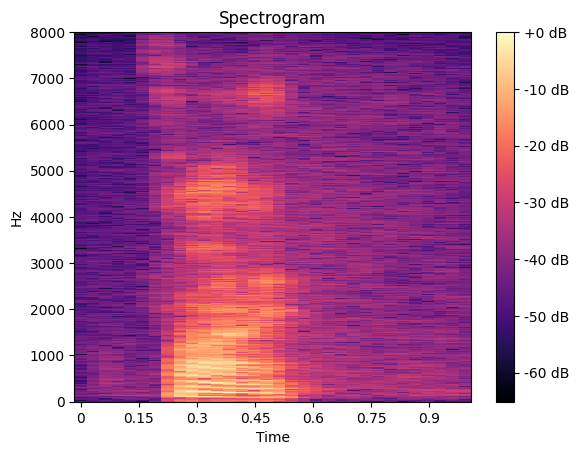

In [ ]:
# just copypasted from librosa documentation
# easy to use package but haven't tested speed/whether it can handle the whole dataset
spec = np.abs(librosa.stft(array))
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(spec, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='fft', sr=sampling_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Spectrogram')
plt.show()

In [ ]:
spec.shape

(1025, 32)

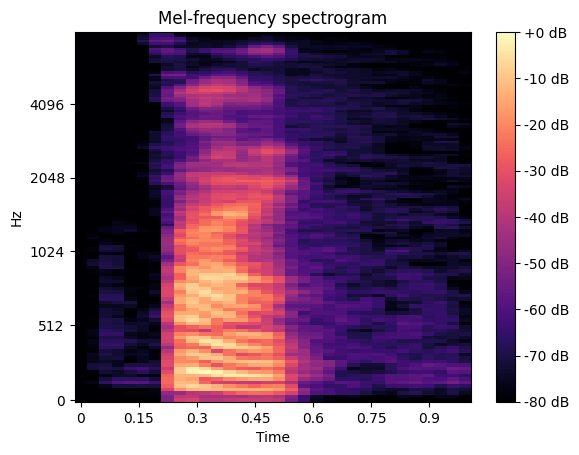

In [ ]:
melspec = librosa.feature.melspectrogram(y=array,sr=sampling_rate)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(melspec, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sampling_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


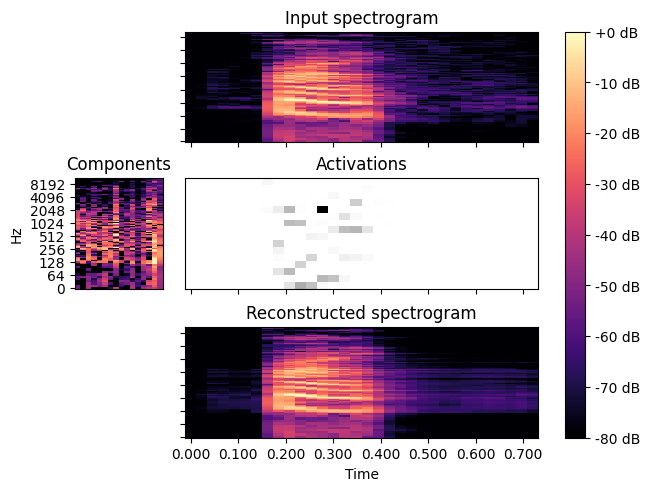

In [ ]:
# copied from https://librosa.org/doc/latest/generated/librosa.decompose.decompose.html
# Maybe the activations could be used as the input voltage for the first input LIF-Layer?
# If I understood this correctly they are basically the strength of the signal at a given frequency and time, cf. Project Pitch Slide 9
# n_components = number of input neurons (but not overlapping then?)
comps, acts = librosa.decompose.decompose(spec, n_components=16)

# plotting
layout = [list(".AAAA"), list("BCCCC"), list(".DDDD")]
fig, ax = plt.subplot_mosaic(layout, constrained_layout=True)
librosa.display.specshow(librosa.amplitude_to_db(spec, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax['A'])
ax['A'].set(title='Input spectrogram')
ax['A'].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(comps,
                                                 ref=np.max),
                         y_axis='log', ax=ax['B'])
ax['B'].set(title='Components')
ax['B'].label_outer()
ax['B'].sharey(ax['A'])
librosa.display.specshow(acts, x_axis='time', ax=ax['C'], cmap='gray_r')
ax['C'].set(ylabel='Components', title='Activations')
ax['C'].sharex(ax['A'])
ax['C'].label_outer()
S_approx = comps.dot(acts)
img = librosa.display.specshow(librosa.amplitude_to_db(S_approx,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax['D'])
ax['D'].set(title='Reconstructed spectrogram')
ax['D'].sharex(ax['A'])
ax['D'].sharey(ax['A'])
ax['D'].label_outer()
fig.colorbar(img, ax=list(ax.values()), format="%+2.f dB")
plt.show()